In [3]:
import numpy as np # Numerical Python higher level mathematical operation arrays/matrics
import pandas as pd # data science/data analysis and machine learning tasks
import seaborn as sns # statistical graphics
import matplotlib.pyplot as plt # creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with label
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import plot_tree
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [4]:
# pip install openpyxl

In [5]:
KC_Housing = 'C:/Users/urvin/OneDrive/Desktop/Data Analytics Sem 4/Python/kc_house_data.csv'
KC = pd.read_csv(KC_Housing)
KC.head() # print first 5 rows
#KC.to_excel('C:/Users/urvin/OneDrive/Desktop/Python Project/File Name.xlsx', index = False)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7.0,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7.0,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6.0,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,NaN,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8.0,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
KC.shape # print dimensions rows/columns

(21613, 21)

In [7]:
KC.describe() # Print statistical summary 
#KC.to_excel('C:/Users/urvin/OneDrive/Desktop/Python Project/summary.xlsx', index = False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21594.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.657127,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175779,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# Round the summary 

In [9]:
round(KC.describe(), 0)
#KC.describe().to_excel('C:/Users/urvin/OneDrive/Desktop/Python Project/summary.xlsx', index = True)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21594.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4.580302e+09,540182.0,3.0,2.0,2080.0,15107.0,1.0,0.0,0.0,3.0,8.0,1788.0,292.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12768.0
std,2.876566e+09,367362.0,1.0,1.0,918.0,41421.0,1.0,0.0,1.0,1.0,1.0,828.0,443.0,29.0,402.0,54.0,0.0,0.0,685.0,27304.0
min,1.000102e+06,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,321950.0,3.0,2.0,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [10]:
KC.info() # summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21594 non-null  float64
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
#Convert type of Date from Object to date

In [12]:
#KC['date'] = pd.to_datetime(KC['date'])
#KC.info()

In [13]:
#For just copy of database.
KC_clean = KC 
Kc_Clean = KC

In [14]:
#Convert date column to 2 separate columns for month and year
date = KC_clean['date'].str.split('-', expand=True)
KC_clean['month_sold'] = date[0].astype('float64')
KC_clean['year_sold'] = date[2].astype('float64')

#Drop original date column
KC_clean.drop(columns=['date'], axis=1, inplace=True)

In [15]:
#  converted the year built column into an age column as this made the model more interpretable. 
# Since the latest year in the dataset was 2015, I created this column by subtracting year built from 2015.

In [16]:
# Age is like age of the house after built to 2015
KC_clean['age'] = 2015 - KC_clean.yr_built
KC_clean = KC_clean.drop(columns=['yr_built'], axis=1)

In [17]:
#  I changed the year renovated column into a binary column. 
# 1 for homes renovated in the past 10 years or built within the past 5 (most likely not needing renovations), 
# and 0 for homes that were not renovated within 10 years.

In [18]:
#Fill missing values
KC_clean.yr_renovated.fillna(0.0, inplace=True)

In [19]:
#Create renovated column
KC_clean['renovated'] = KC_clean.year_sold - KC_clean.yr_renovated

In [20]:
#Replace any values less than 10 with 1, and any values over 10 with 0renovated = df.renovated.values
age = KC_clean.age.values
values = np.where(KC_clean['renovated'] <= 10, 1, 0)
KC_clean['renovated'] = np.where(age <= 5, 1, values)

In [21]:
#Drop yr_renovated column
KC_clean.drop(columns=['yr_renovated'], axis=1, inplace=True)

In [22]:
KC_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21594 non-null  float64
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  month_

In [23]:
# Finding the null value 

In [24]:
KC_clean.isnull().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade            19
sqft_above        0
sqft_basement     0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
month_sold        0
year_sold         0
age               0
renovated         0
dtype: int64

In [25]:
# Grade has a 19 null value so Replacing it with 0

In [26]:
KC_clean.grade.unique()

array([ 7.,  6., nan,  8., 11.,  5.,  9., 10., 12.,  4.,  3., 13.,  1.])

In [27]:
mean_grade = round(KC_clean['grade'].mean(),0)
print(mean_grade)

8.0


In [28]:
KC_clean["grade"].fillna(mean_grade, inplace = True)

In [29]:
#Kc_Clean['grade'].replace(np.nan,mean_grade, inplace = True)
KC_clean.isnull().sum()


id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month_sold       0
year_sold        0
age              0
renovated        0
dtype: int64

In [30]:
Kc_Clean.grade.unique()

array([ 7.,  6., nan,  8., 11.,  5.,  9., 10., 12.,  4.,  3., 13.,  1.])

In [31]:
#Checking for duplicate rows

In [32]:
duplicates = Kc_Clean[Kc_Clean.duplicated()]
print(len(duplicates))

0


In [33]:
# (Data Wrngling)
# Delete the first Row id 
KC_clean.drop('id', axis = 1, inplace = True)

In [34]:
#KC_clean.info()

In [35]:
# Sort values by price
KC_clean.sort_values("price")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated
1149,75000.0,1,0.00,670,43377,1.0,0,0,3,3.0,...,0,98022,47.2638,-121.906,1160,42882,2015.0,17.0,49,0
15293,78000.0,2,1.00,780,16344,1.0,0,0,1,5.0,...,0,98168,47.4739,-122.280,1700,10387,2014.0,6.0,73,1
465,80000.0,1,0.75,430,5050,1.0,0,0,2,4.0,...,0,98014,47.6499,-121.909,1200,7500,2014.0,23.0,103,0
16198,81000.0,2,1.00,730,9975,1.0,0,0,1,5.0,...,0,98168,47.4808,-122.315,860,9000,2015.0,24.0,72,0
8274,82000.0,3,1.00,860,10426,1.0,0,0,3,6.0,...,0,98146,47.4987,-122.341,1140,11250,2014.0,5.0,61,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12.0,...,1280,98004,47.6232,-122.220,4600,21750,2015.0,13.0,6,0
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13.0,...,3000,98039,47.6289,-122.233,3560,24345,2014.0,4.0,14,1
9254,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13.0,...,1030,98039,47.6305,-122.240,4540,42730,2014.0,19.0,14,0
3914,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11.0,...,2360,98004,47.6500,-122.214,3930,25449,2014.0,11.0,75,1


In [36]:
#Exploratory data analysis
#Counting the number of house with unique number of floors
#Frame and Plot it.

In [37]:
for count in KC_clean:
    print(KC_clean[count].value_counts())
    print()

450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
288349.0      1
285750.0      1
162950.0      1
612995.0      1
897000.0      1
Name: price, Length: 3625, dtype: int64

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
2678      1
6900      1
6980      1
3078      1
2031      1
Name: sqft_living, Length: 1038, dtype: int64

5000     3

In [38]:
#floors_count = KC_clean['floors'].value_counts()
#floors_count.to_frame()

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floors', ylabel='count'>

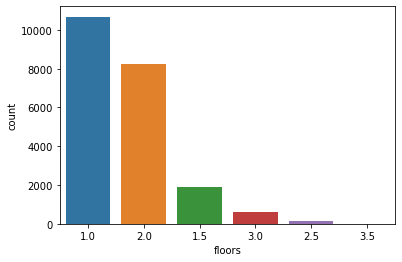

In [39]:
sns.countplot(KC_clean.floors, order = KC_clean['floors'].value_counts().index)

In [40]:
#bedrooms_count = KC_clean['bedrooms'].value_counts()
#bedrooms_count.to_frame()

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

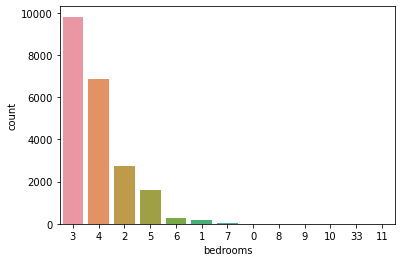

In [41]:
sns.countplot(KC_clean.bedrooms, order = KC_clean['bedrooms'].value_counts().index)

In [42]:
#bathrooms_count = KC_clean['bathrooms'].value_counts()
#bathrooms_count.to_frame()

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathrooms', ylabel='count'>

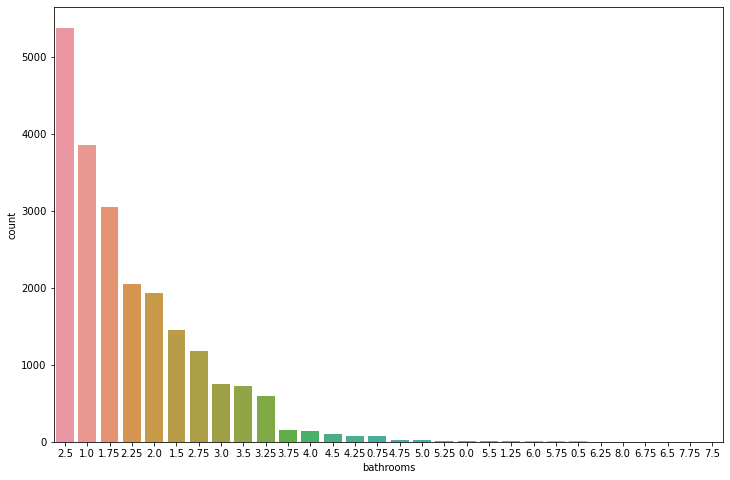

In [43]:
plt.figure(figsize = (12,8))
sns.countplot(KC_clean.bathrooms, order = KC_clean['bathrooms'].value_counts().index)

In [44]:
#waterfront_count = KC_clean['waterfront'].value_counts()
#waterfront_count.to_frame()

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='waterfront', ylabel='count'>

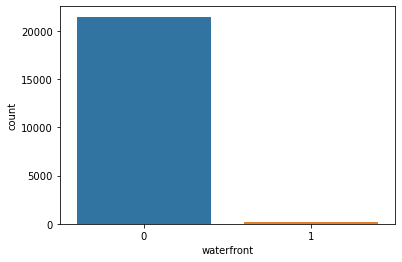

In [45]:
sns.countplot(KC_clean.waterfront, order = KC_clean['waterfront'].value_counts().index)

In [46]:
#view_count = KC_clean['view'].value_counts().sort_values()
#view_count.to_frame()

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='view', ylabel='count'>

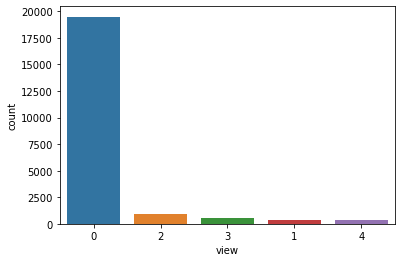

In [47]:
sns.countplot(KC_clean.view, order = KC_clean['view'].value_counts().index)

In [48]:
#grade_count = KC_clean['grade'].value_counts().sort_values()
#grade_count.to_frame()

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

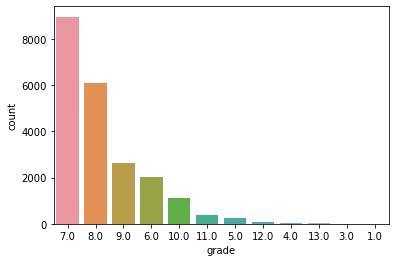

In [49]:
sns.countplot(KC_clean.grade, order = KC_clean['grade'].value_counts().index)

In [50]:
#condition_count = KC_clean['condition'].value_counts()
#condition_count.to_frame()

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition', ylabel='count'>

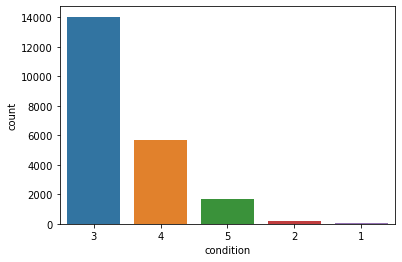

In [51]:
sns.countplot(KC_clean.condition, order = KC_clean['condition'].value_counts().index)

In [52]:
#Latitude and Longitude

<AxesSubplot:xlabel='long', ylabel='lat'>

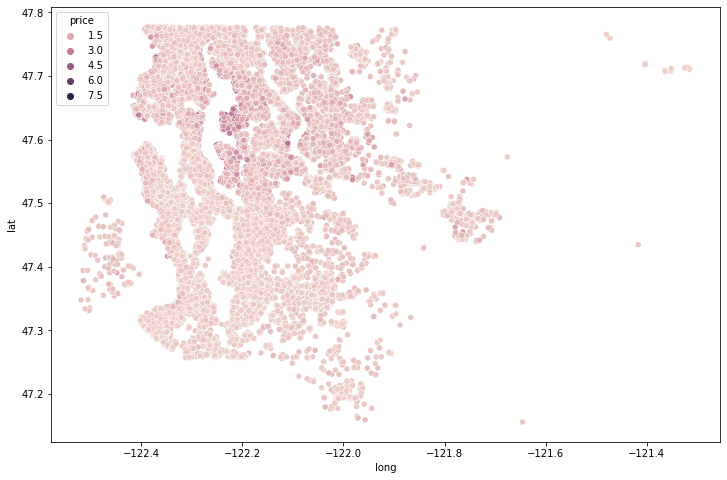

In [53]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'long', y = 'lat', data = KC_clean,  hue = 'price' )

In [54]:
# Investigate bedrooms
#KC_clean['bedrooms'].value_counts()

In [55]:
# The house with 33 bedrooms is worth exploring further.

In [56]:
KC_clean[KC_clean['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7.0,...,580,98103,47.6878,-122.331,1330,4700,2014.0,25.0,68,0


In [57]:
# With 1.75 bathrooms, a sale price of $640,000 it is likely that this house has 3 bedrooms and the 33 was a data entry error.

In [58]:
# Fix typo for bedrooms
KC_clean.loc[15870, 'bedrooms'] = 3

In [59]:
KC_clean[KC_clean['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated


In [60]:
KC_clean[KC_clean['bedrooms'] == 11]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated
8757,520000.0,11,3.0,3000,4960,2.0,0,0,3,7.0,...,600,98106,47.556,-122.363,1420,4960,2014.0,21.0,97,1


In [61]:
KC_clean[KC_clean['bedrooms'] == 3]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7.0,...,0,98178,47.5112,-122.257,1340,5650,2014.0,13.0,60,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7.0,...,400,98125,47.7210,-122.319,1690,7639,2014.0,9.0,64,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8.0,...,0,98074,47.6168,-122.045,1800,7503,2015.0,18.0,28,0
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7.0,...,0,98003,47.3097,-122.327,2238,6819,2014.0,27.0,20,0
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,8.0,...,0,98198,47.4095,-122.315,1650,9711,2015.0,15.0,52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21603,507250.0,3,2.50,2270,5536,2.0,0,0,3,8.0,...,0,98065,47.5389,-121.881,2270,5731,2014.0,25.0,12,0
21604,429000.0,3,2.00,1490,1126,3.0,0,0,3,8.0,...,0,98144,47.5699,-122.288,1400,1230,2015.0,26.0,1,1
21607,475000.0,3,2.50,1310,1294,2.0,0,0,3,8.0,...,130,98116,47.5773,-122.409,1330,1265,2015.0,19.0,7,0
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8.0,...,0,98103,47.6993,-122.346,1530,1509,2014.0,21.0,6,0


In [62]:
KC_clean[KC_clean['bedrooms'] == 10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated
13314,1150000.0,10,5.25,4590,10920,1.0,0,2,3,9.0,...,2090,98004,47.5861,-122.113,2730,10400,2014.0,14.0,7,0
15161,650000.0,10,2.00,3610,11914,2.0,0,0,4,7.0,...,600,98006,47.5705,-122.175,2040,11914,2014.0,29.0,57,0
19254,660000.0,10,3.00,2920,3745,2.0,0,0,4,7.0,...,1060,98105,47.6635,-122.320,1810,3745,2014.0,29.0,102,0


In [63]:
# Boxplot to see whether houses with waterfront or without waterfront have outliers or not

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\urvin\Anaconda3\lib\si

ValueError: num must be 1 <= num <= 16, not 17

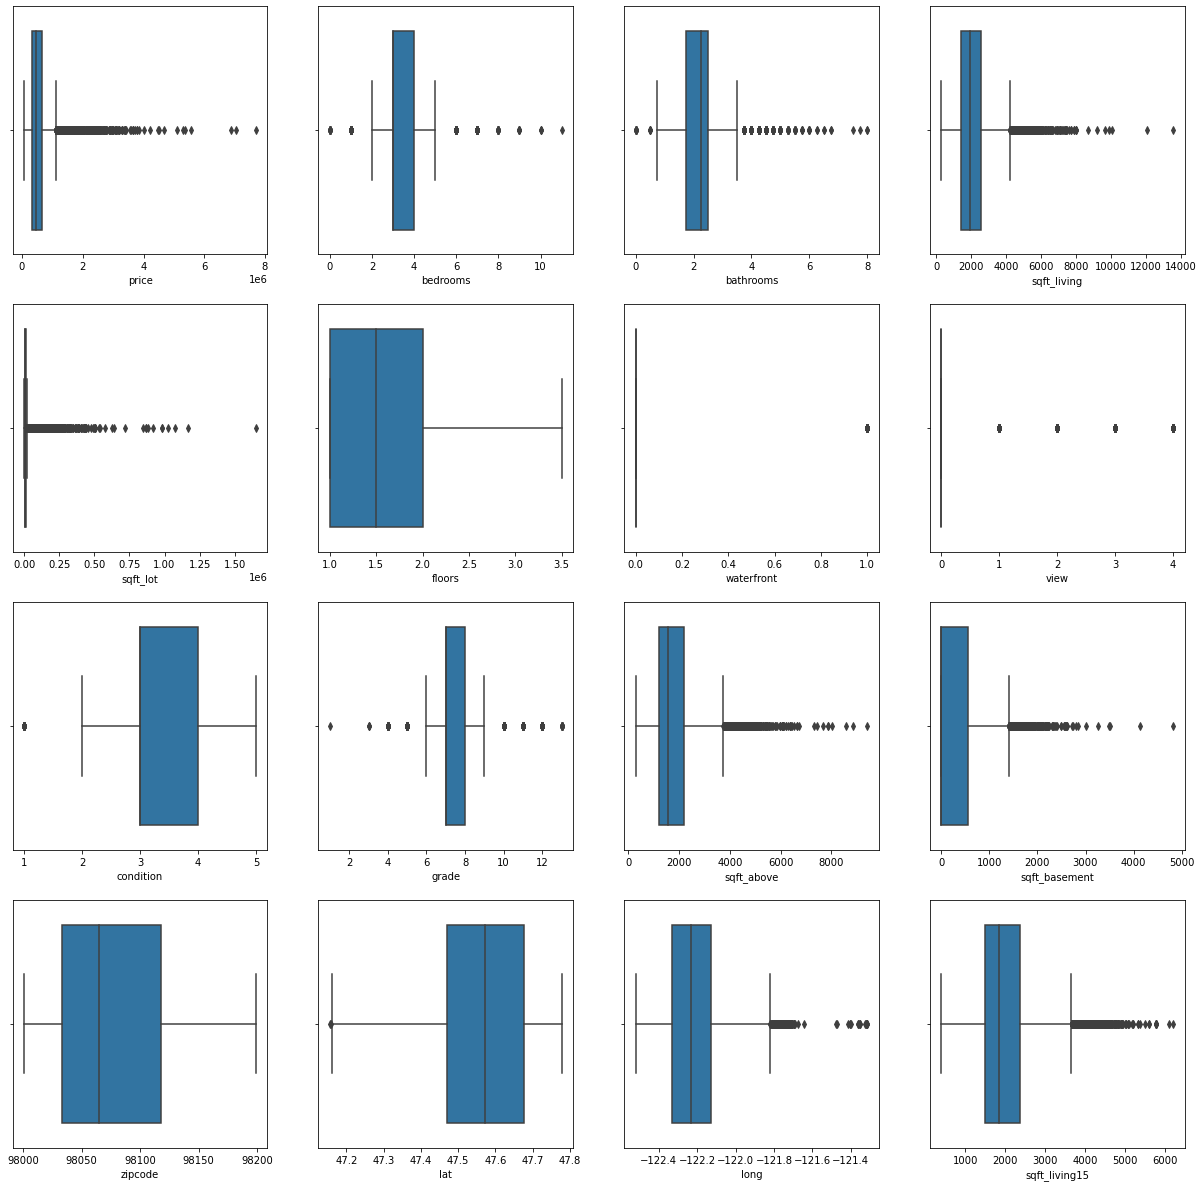

In [64]:
# ploting boxplot for all the columns to see distribution of the data in each columns 

KC_clean_describe = KC_clean

plt.figure(figsize =(21, 21))
x = 1 

for column in KC_clean_describe.columns:
    plt.subplot(4,4,x)
    sns.boxplot(KC_clean_describe[column])
    x+=1
plt.tight_layout # automatically adjust subplot parameters to give specified padding.
plt.show()


In [65]:
# Check initial size of data to see how much data we lost
originalsize = len(KC_clean)
originalsize

21613

In [66]:
#  for absolute values, we call the numpy. abs() function and pass in that array as an argument : abs

In [67]:

# Whilst we could investigate outliers individually, we have chosen to take a more general approach. 
#  To ensure our model fits the majority of the data and improve the quality of our visualisations 
# and exploratory data analysis, we have elected to drop entries with a z-score above 3 
# (i.e. where the value is more than 3 standard deviations from the mean) for a number of features.

# In the case of square-footage, these are continuous variables and we want to ensure 
# we are focussing on the 'average' rather than extreme cases. In the case of latitude and longitude, 
# we want to focus on the core location.

In [68]:
# Define function to remove outliers
def remove_outliers(KC_clean):
    '''removes entries with z-score above 3 for specific columns'''
    variables = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront','view','condition','grade', 
                 'sqft_above', 'sqft_basement','age','renovated','zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        KC_clean = KC_clean[np.abs(KC_clean[variable]-KC_clean[variable].mean()) <= (3*KC_clean[variable].std())]
        
    return KC_clean

In [69]:
# Apply function to dataset
KC_clean1 = remove_outliers(KC_clean)

In [70]:
# See size of df now
newsize = len(KC_clean1)
newsize

18787

In [71]:
KC_clean1.shape

(18787, 21)

In [72]:
# How much rows we lost

originalsize - newsize

2826

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\urvin\Anaconda3\lib\si

ValueError: num must be 1 <= num <= 16, not 17

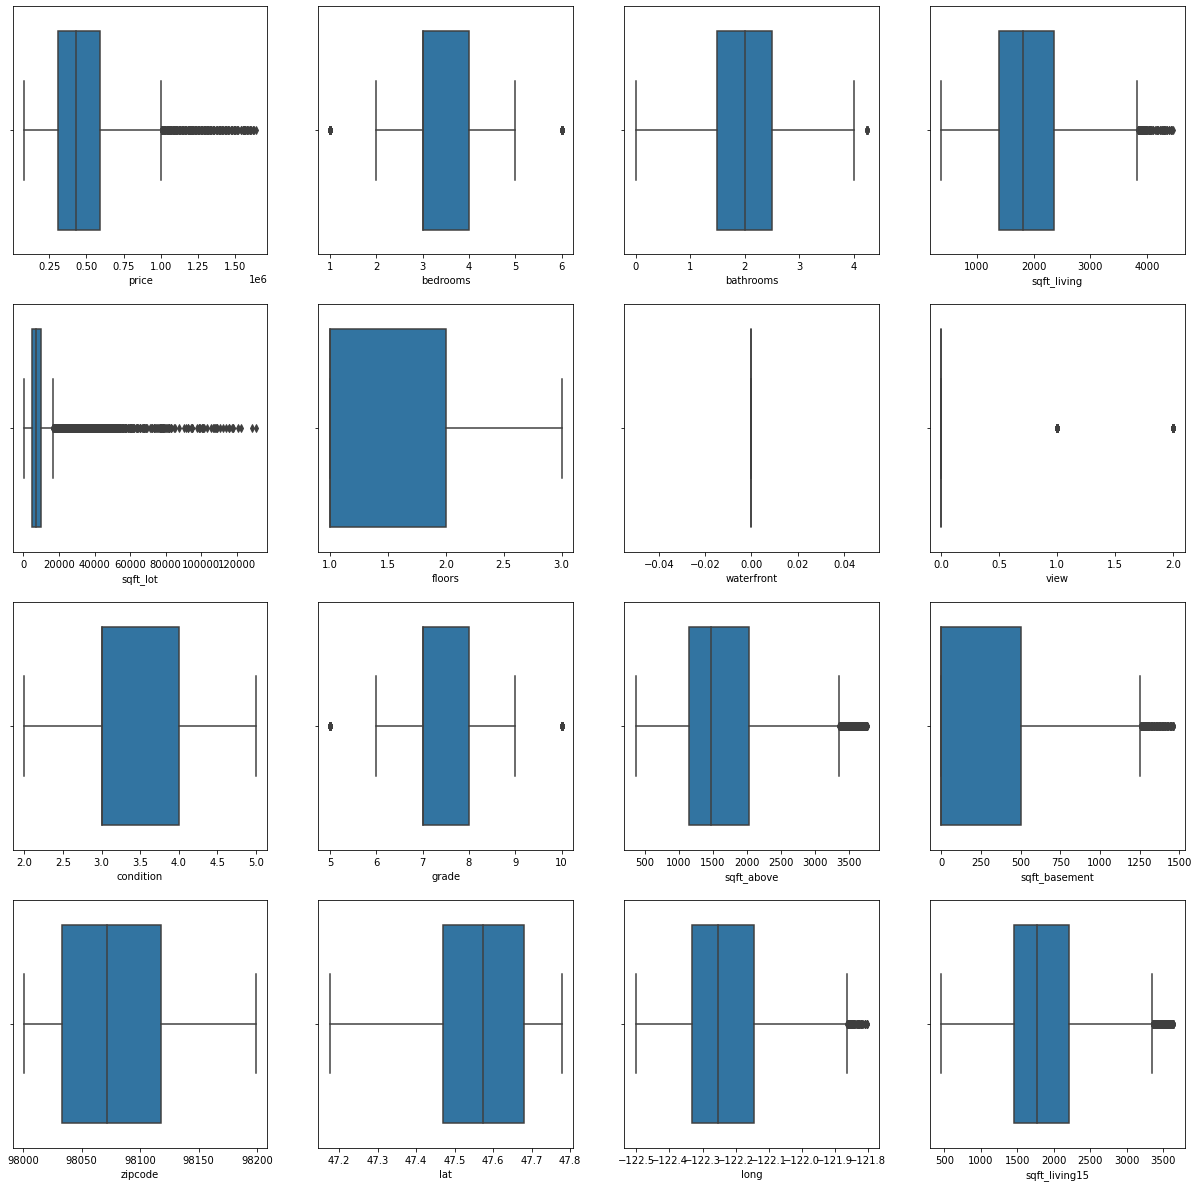

In [73]:
# ploting boxplot for all the columns to see distribution of the data in each columns 

KC_clean_describe = KC_clean1

plt.figure(figsize =(21, 21))
x = 1 

for column in KC_clean_describe.columns:
    plt.subplot(4,4,x)
    sns.boxplot(KC_clean_describe[column])
    x+=1
plt.tight_layout
plt.show()

<AxesSubplot:xlabel='grade', ylabel='price'>

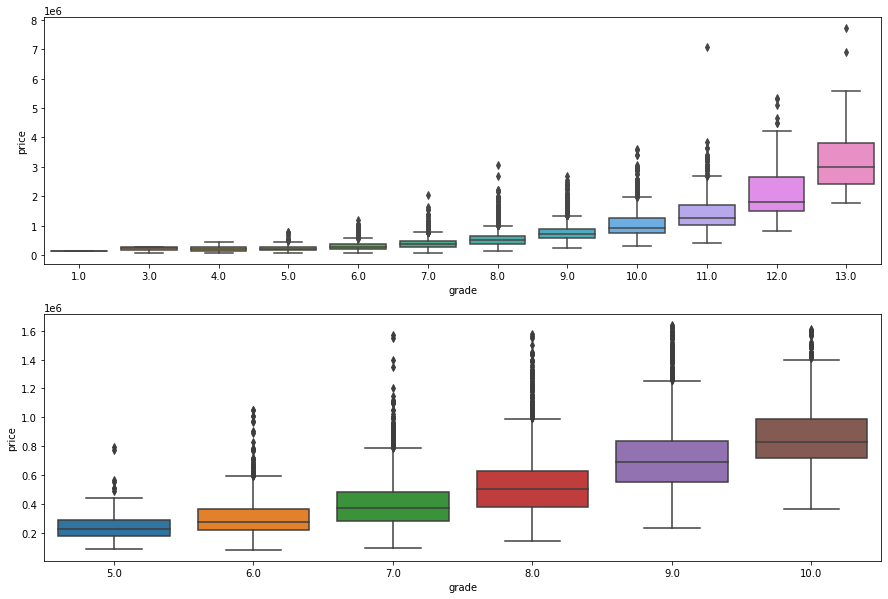

In [74]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=KC_clean['grade'],y=KC_clean['price'],ax=ax[0])
sns.boxplot(x=KC_clean1['grade'],y=KC_clean1['price'],ax=ax[1])


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

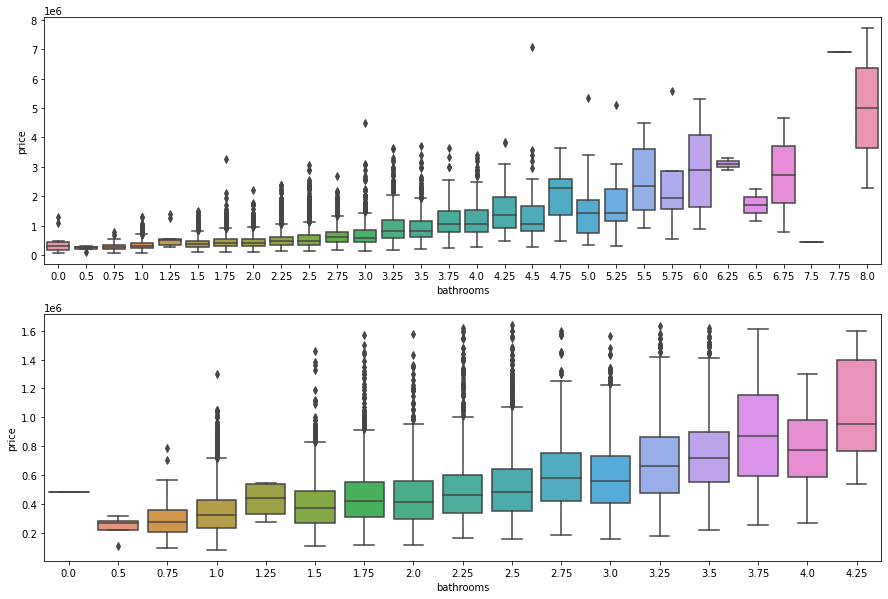

In [75]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=KC_clean['bathrooms'],y=KC_clean['price'],ax=ax[0])
sns.boxplot(x=KC_clean1['bathrooms'],y=KC_clean1['price'],ax=ax[1])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

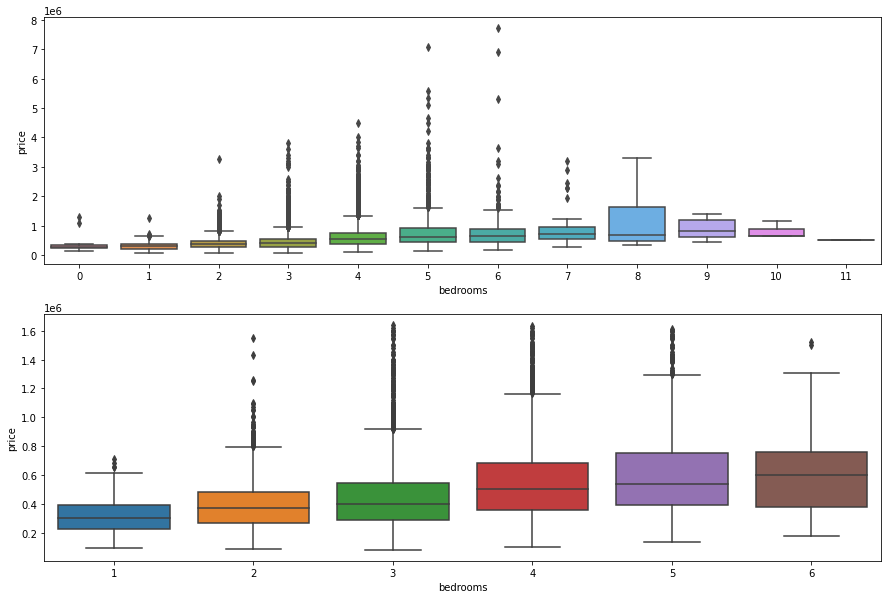

In [76]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=KC_clean['bedrooms'],y=KC_clean['price'],ax=ax[0])
sns.boxplot(x=KC_clean1['bedrooms'],y=KC_clean1['price'],ax=ax[1])

<AxesSubplot:xlabel='waterfront', ylabel='price'>

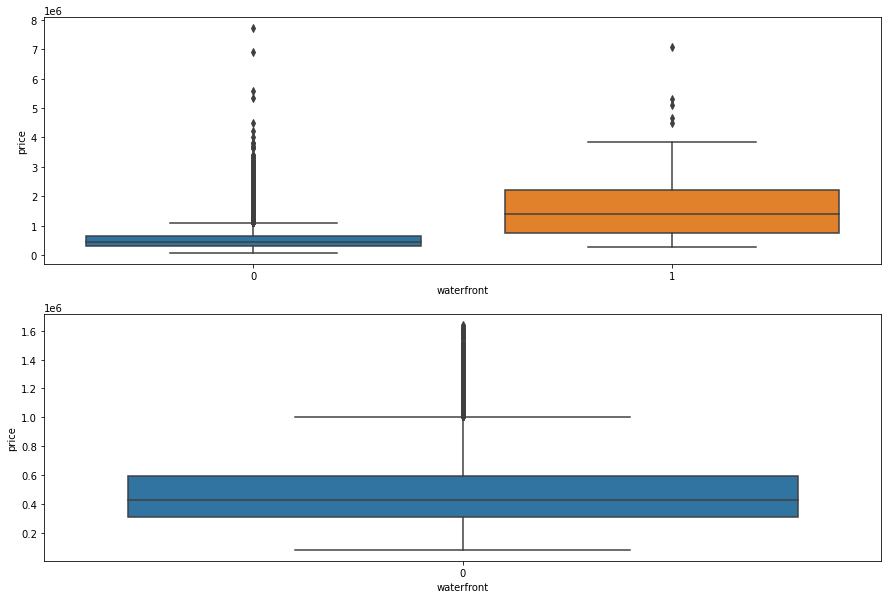

In [77]:
fig,ax=plt.subplots(2,1,figsize=(15,10))
sns.boxplot(x=KC_clean['waterfront'],y=KC_clean['price'],ax=ax[0])
sns.boxplot(x=KC_clean1['waterfront'],y=KC_clean1['price'],ax=ax[1])

In [78]:
# after observing the above 2 diagram we do not need waterfront attribute for predict the price due to outliers
# so, We can remove it
KC_clean1.drop(columns=['waterfront'], axis=1, inplace=True)

In [79]:
# After removing Outliers the 

In [80]:
# A distplot is plotted for sqft living to see if the data is skewed or not 
# kde = kernel density estimation
#  rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis.

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

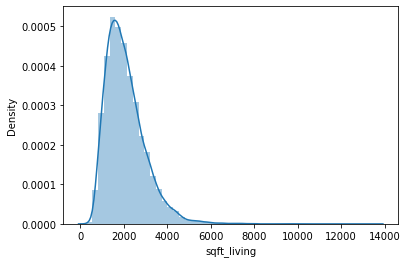

In [81]:
sns.distplot(KC_clean['sqft_living'],hist=True,kde=True,label='sqft_living') # with outliers

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

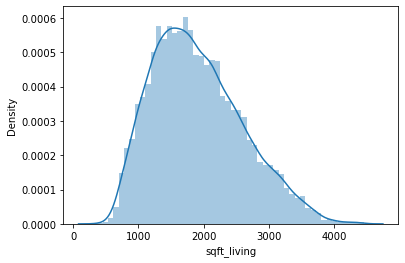

In [82]:
sns.distplot(KC_clean1['sqft_living'],hist=True,kde=True,label='sqft_living') # without outliers

In [83]:
# A distplot is plotted for sqft above to see if the data is skewed or not

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

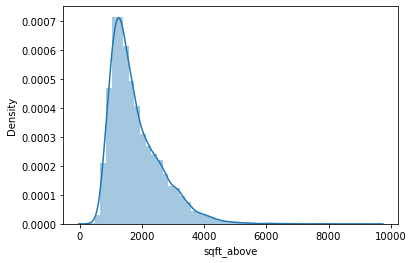

In [84]:
sns.distplot(KC_clean['sqft_above'],hist=True,kde=True,rug=False,label='sqft_above',norm_hist=True)  # with outliers

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_above', ylabel='Density'>

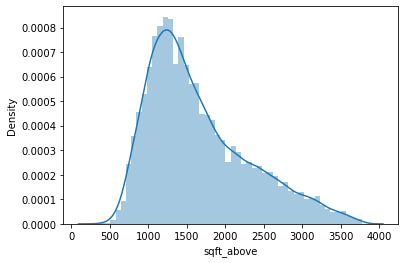

In [85]:
sns.distplot(KC_clean1['sqft_above'],hist=True,kde=True,rug=False,label='sqft_above',norm_hist=True) # without outliers

In [86]:
#To get an idea of the linear relationship between features and price, we will use a regplot for each feature.

C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\urvin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\urvin\Anacond

<Figure size 1008x720 with 0 Axes>

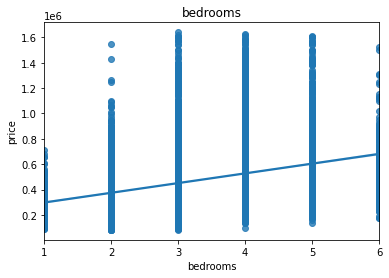

<Figure size 1008x720 with 0 Axes>

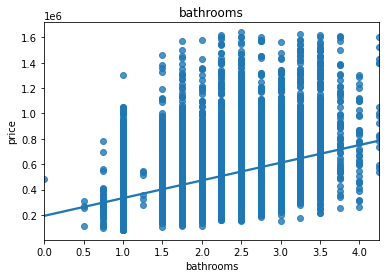

<Figure size 1008x720 with 0 Axes>

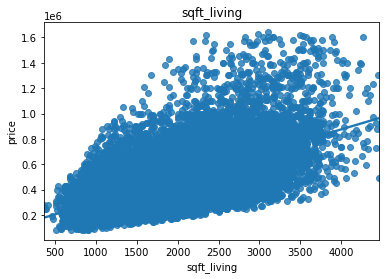

<Figure size 1008x720 with 0 Axes>

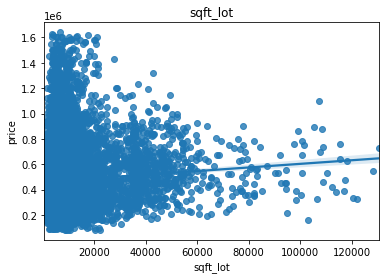

<Figure size 1008x720 with 0 Axes>

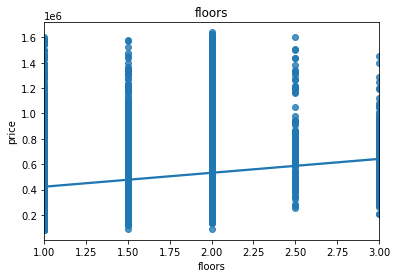

<Figure size 1008x720 with 0 Axes>

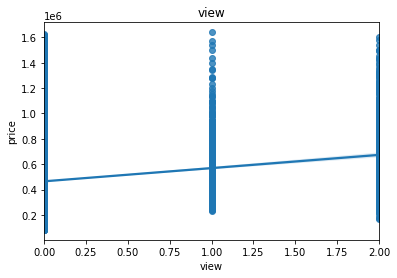

<Figure size 1008x720 with 0 Axes>

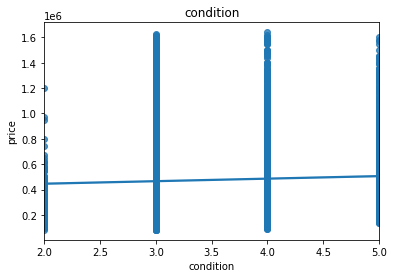

<Figure size 1008x720 with 0 Axes>

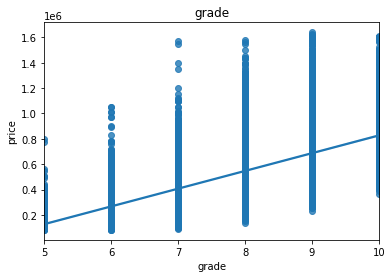

<Figure size 1008x720 with 0 Axes>

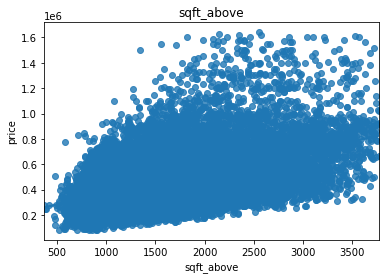

<Figure size 1008x720 with 0 Axes>

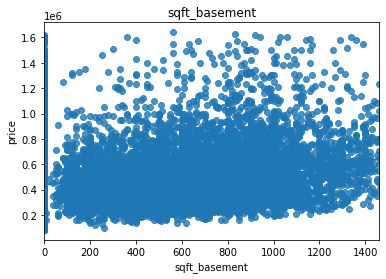

<Figure size 1008x720 with 0 Axes>

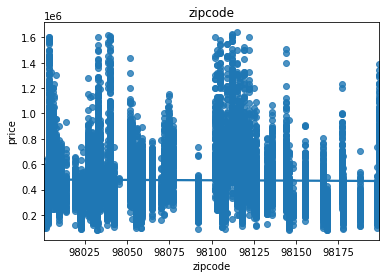

<Figure size 1008x720 with 0 Axes>

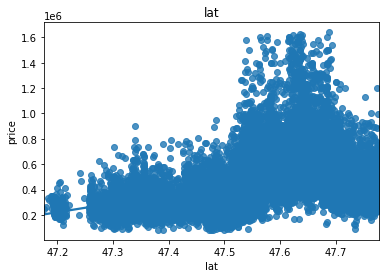

<Figure size 1008x720 with 0 Axes>

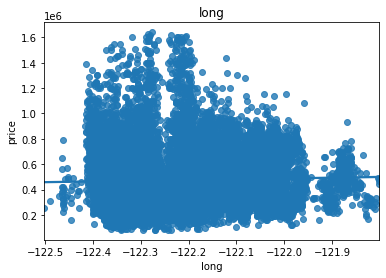

<Figure size 1008x720 with 0 Axes>

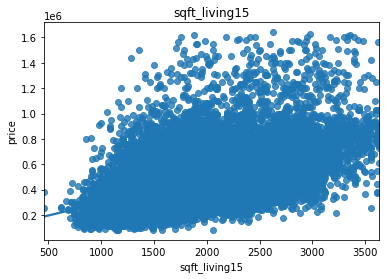

<Figure size 1008x720 with 0 Axes>

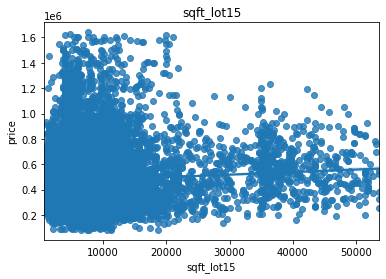

<Figure size 1008x720 with 0 Axes>

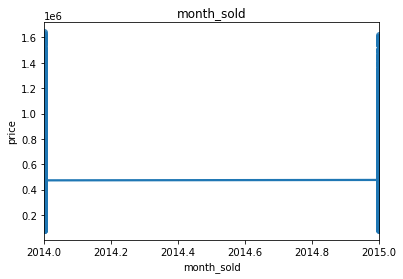

<Figure size 1008x720 with 0 Axes>

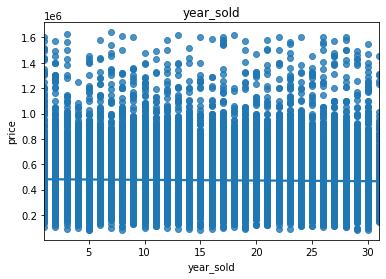

<Figure size 1008x720 with 0 Axes>

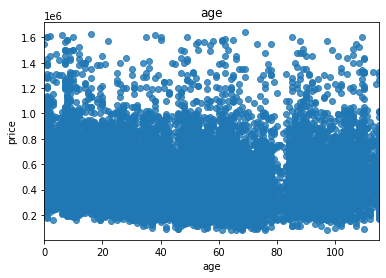

<Figure size 1008x720 with 0 Axes>

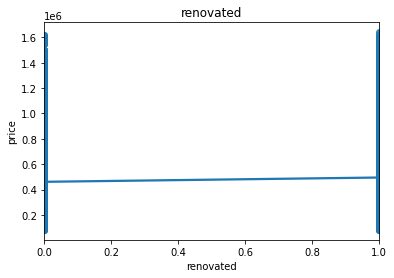

In [87]:
#Preview the relationship between features and target variables

X = KC_clean1.drop(columns=['price'], axis=1)
for col in X.columns:
    plt.figure(figsize=(14, 10))
    plt.subplots(1, 1)
    sns.regplot(X[col], KC_clean1.price)
    plt.title(col)

In [88]:
# There are several features where there is a clear linear relationship with price, 
# but there are some features where the relationship is not so clear. 
# We can further look at the correlation between all of our features and 
# price to get a better idea of which features have a linear relationship with the dependent variable. 
# Prior to doing so, let's look at a map of these houses based on the latitude and longitude coordinates 
# given to get an idea of how price varies by location.

<AxesSubplot:xlabel='long', ylabel='lat'>

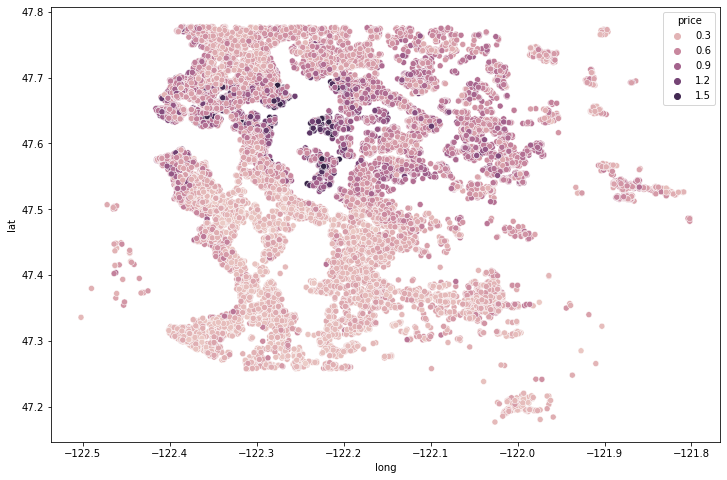

In [89]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'long', y = 'lat', data = KC_clean1,  hue = 'price' )

In [90]:
# Now that we have our data cleaned, we will look at how each predictor correlates with price and 
# we'll plot the correlations as well.

In [91]:
# Correlation between price and other attribute.

In [92]:
KC_clean1.corr()['price'].sort_values(ascending=False)


price            1.000000
grade            0.600546
sqft_living      0.590665
sqft_living15    0.505244
sqft_above       0.488435
lat              0.438441
bathrooms        0.421721
bedrooms         0.289016
floors           0.263285
sqft_basement    0.229298
view             0.184577
renovated        0.073640
sqft_lot15       0.061825
sqft_lot         0.060003
condition        0.057519
long             0.033232
month_sold       0.006717
age             -0.006942
zipcode         -0.013652
year_sold       -0.020043
Name: price, dtype: float64

In [93]:
# Lets graphically compare "price" to the top four correlated features to see
# if we can spot any trends or anomalies (outliers) with the data.

In [94]:
#from pandas.plotting import autocorrelation_plot
#KC_clean1.hist(figsize = (15,12))
#plt.show()

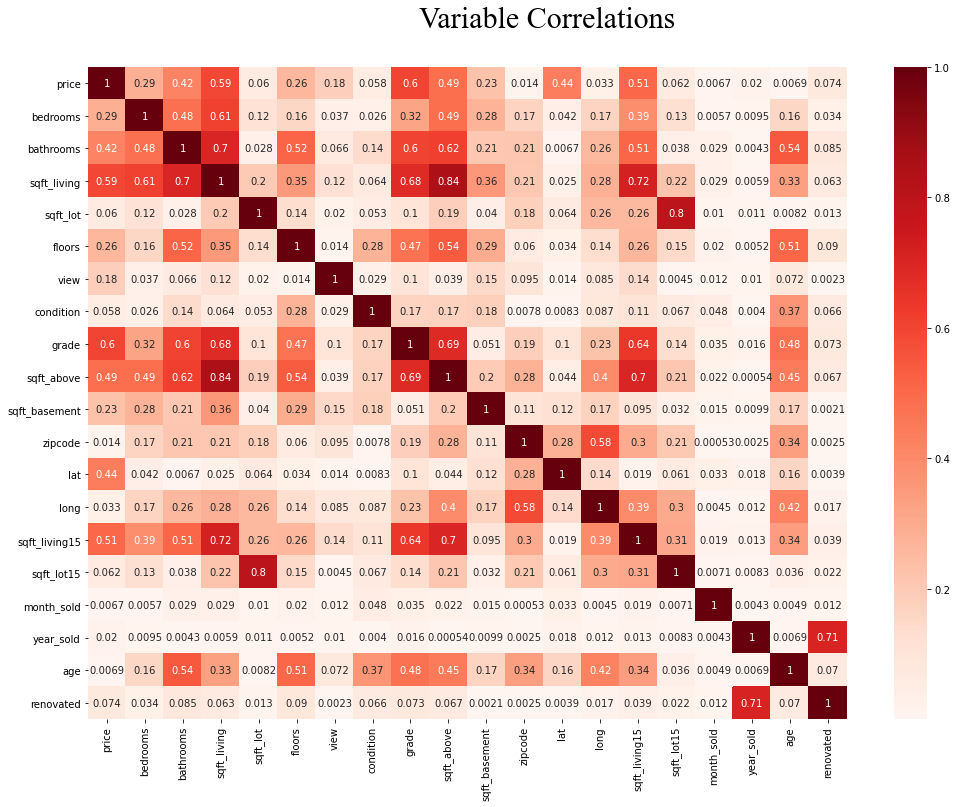

In [95]:
corr = KC_clean1.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='Times New Roman')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)

In [96]:
# his gives a general idea of which predictors are correlated with each other. 
# To filter even further, let's take a look at variables with a correlation above 0.7.


In [97]:
# As we might expect, many of the variables related to the size of homes are highly correlated with each other. 
# Generally, we don’t want to include any two x variables whose correlation exceeds .80 in the same model.
# We do, however, want to include variables that are correlated with the y variable. 

In [100]:
# Model Development

In [101]:
# training and test sets

In [ ]:
#Create feature and target columns
X = KC_clean1.drop(columns=['price'], axis=1)
y = KC_clean1.price

In [132]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=333)

In [133]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13150, 19), (5637, 19), (13150,), (5637,))

In [134]:
# linear regression model

In [135]:
#  how close the data pairs in a set are to their fitted regression line.
# An R squared of 0 means that the dependent variable cannot be predicted by the independent variable, 
# while an R squared of 1 means that it can be predicted without error.

In [136]:
 #Fit the model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
model1 = lm.score(X_train, y_train)
model
model1

0.6623688360649762

In [137]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold', 'age',
       'renovated'],
      dtype='object')

In [138]:
X_test.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold', 'age',
       'renovated'],
      dtype='object')

In [139]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'month_sold', 'year_sold', 'age',
       'renovated'],
      dtype='object')

In [109]:
model.coef_

array([-1.43424866e+04,  3.01743316e+04,  6.42082237e+01,  3.97770507e-01,
        2.67469997e+04,  3.70123486e+04,  2.91181673e+04,  8.60328787e+04,
        3.54241796e+01,  2.87840440e+01, -3.23475814e+02,  5.66472486e+05,
       -9.19636179e+04,  4.48094192e+01, -1.92176344e+00,  2.48131664e+04,
        7.66483730e+02,  2.25440957e+03,  2.67638713e+04])

In [110]:
#View model accuracy
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print('Training Score:', round(train_score, 2))
print('Test Score:', round(test_score, 2))
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Training Score: 0.66
Test Score: 0.68
Intercept: -57146253.774070896
Coefficients: [-1.43424866e+04  3.01743316e+04  6.42082237e+01  3.97770507e-01
  2.67469997e+04  3.70123486e+04  2.91181673e+04  8.60328787e+04
  3.54241796e+01  2.87840440e+01 -3.23475814e+02  5.66472486e+05
 -9.19636179e+04  4.48094192e+01 -1.92176344e+00  2.48131664e+04
  7.66483730e+02  2.25440957e+03  2.67638713e+04]


In [111]:
r2_linreg = model.score(X_test, y_test)
MAE_linreg = mean_absolute_error(y_test, test_preds)
MSE_linreg = mean_squared_error(y_test, test_preds)
RMSE_linreg = np.sqrt(MSE_linreg)

In [112]:
print('Evaluation Matrix LinReg : ')
print("")
print(f'MAE: {MAE_linreg}')
print(f'MSE:{MSE_linreg}')
print(f"RMSE : {RMSE_linreg}")
print(f"R2 : {r2_linreg}")

Evaluation Matrix LinReg : 

MAE: 92332.11939926428
MSE:16244912012.764458
RMSE : 127455.52954958234
R2 : 0.6759024072145032


In [113]:
import statsmodels.api as sm
#View model summary in statsmodels
X_train = sm.add_constant(X_train)
smmodel = sm.OLS(y_train, X_train).fit()
print(smmodel.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1431.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:25:43   Log-Likelihood:            -1.7354e+05
No. Observations:               13150   AIC:                         3.471e+05
Df Residuals:                   13131   BIC:                         3.473e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.715e+07   5.48e+06    -10.437

In [114]:
# A residual is the difference between an observed value and a predicted value in a regression model. 
# It is calculated as: Residual = Observed value – Predicted value.

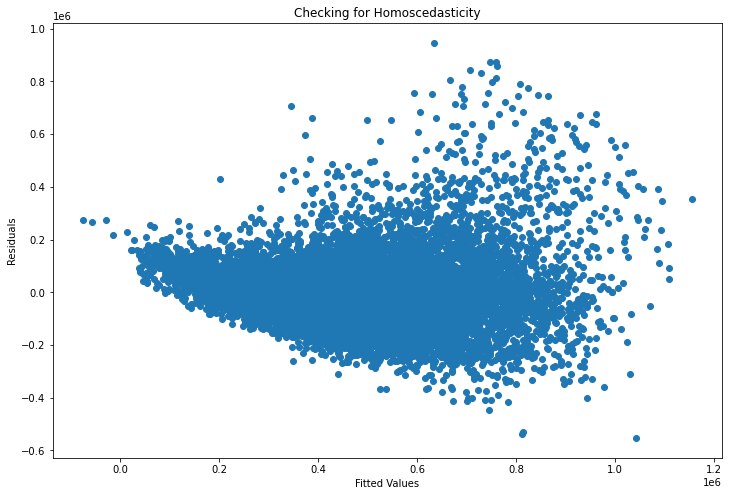

In [115]:
plt.figure(figsize=(12, 8))
plt.scatter(train_preds, smmodel.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Checking for Homoscedasticity')
plt.show()

In [116]:
# KNN

In [164]:
# Initialize learning model
knn = KNeighborsRegressor(n_neighbors=4)

In [165]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [166]:
knn_predict = knn.predict(X_test)

In [167]:
knn_train =  knn.score(X_train,y_train)

In [168]:
r2_knn = r2_knn = r2_score(y_test, knn_predict)
MAE_knn = mean_absolute_error(y_test, knn_predict)
MSE_knn = mean_squared_error(y_test, knn_predict)
RMSE_knn = np.sqrt(MSE_knn)

In [169]:
print('Evaluation Matrix KNearestNeighbors : ')
print("")
print(f'MAE: {MAE_knn}')
print(f'MSE:{MSE_knn}')
print(f"RMSE : {RMSE_knn}")
print(f"R2 : {r2_knn}")

Evaluation Matrix KNearestNeighbors : 

MAE: 129808.49547631718
MSE:30672429334.523396
RMSE : 175135.4599574952
R2 : 0.38806313605199916


In [151]:
#Decision Tree Base Model

In [152]:
base_DT = DecisionTreeRegressor()

In [153]:
base_DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [154]:
DT_train =  base_DT.score(X_train,y_train)

In [155]:
y_base_DT = base_DT.predict(X_test)

In [156]:
r2_base_DT =  r2_score(y_base_DT, y_test)
MAE_DT = mean_absolute_error(y_test, y_base_DT)
MSE_DT = mean_squared_error(y_test, y_base_DT)
RMSE_DT = np.sqrt(MSE_DT)

In [157]:
print('Evaluation Matrix Decision Tree : ')
print("")
print(f'MAE: {MAE_DT}')
print(f'MSE:{MSE_DT}')
print(f"RMSE : {RMSE_DT}")
print(f"R2 : {r2_base_DT}")

Evaluation Matrix Decision Tree : 

MAE: 78461.55996097215
MSE:14001782968.965452
RMSE : 118329.12984115725
R2 : 0.7276427439009999


In [162]:
# Comparing Error Rate with the K Value

In [170]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [171]:
# This Method shows only 1 cluster is good.

Text(0, 0.5, 'Mean Error')

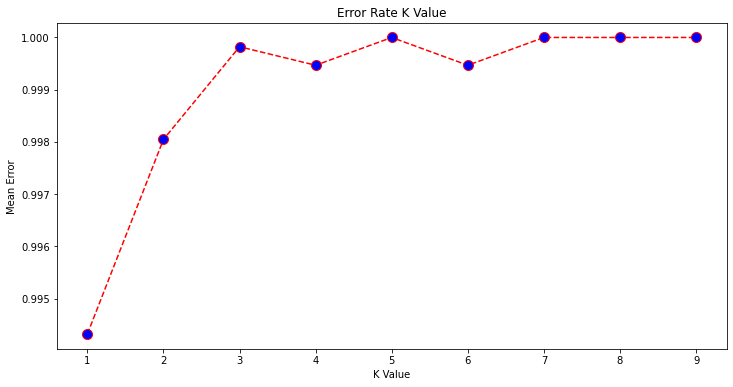

In [172]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [173]:
#Random Forest Regressor

In [174]:
RF = RandomForestRegressor()

In [175]:
RF.fit(X_train, y_train)

RandomForestRegressor()

In [176]:
y_base_RF = RF.predict(X_test)

In [177]:
RF_train =  RF.score(X_train,y_train)

In [178]:
r2_RF = r2_score(y_test, y_base_RF)
MAE_RF = mean_absolute_error(y_test, y_base_RF)
MSE_RF = mean_squared_error(y_test, y_base_RF)
RMSE_RF = np.sqrt(MSE_RF)

In [179]:
print('Evaluation Matrix Random Forest : ')
print("")
print(f'MAE: {MAE_RF}')
print(f'MSE:{MSE_RF}')
print(f"RMSE : {RMSE_RF}")
print(f"R2 : {r2_RF}")

Evaluation Matrix Random Forest : 

MAE: 53488.89229312283
MSE:6516063286.617214
RMSE : 80722.13628625803
R2 : 0.8699998852581527


In [180]:
#Kc_data = {'Linear regression': [r2_linreg,MAE_linreg,MSE_linreg,RMSE_linreg],
    #    'Linear regression Train':[model1, np.nan, np.nan, np.nan],    
    #'KNN':[r2_knn, MAE_knn, MSE_knn, RMSE_knn],
     #   'KNN_train':[knn_train, np.nan, np.nan, np.nan],     
    #'Decision Tree':[r2_base_DT,MAE_DT,MSE_DT,RMSE_DT],
     #   'Decision Tree_train':[DT_train, np.nan, np.nan, np.nan],
    #'Random_Forest':[r2_RF, MAE_RF, MSE_RF, RMSE_RF],
     #   'Random_Forest_Train':[RF_train,np.nan,np.nan,np.nan]}

In [181]:
Kc_data = {'Linear regression': [r2_linreg,MAE_linreg,MSE_linreg,RMSE_linreg],
        'KNN':[r2_knn, MAE_knn, MSE_knn, RMSE_knn],
        'Decision Tree':[r2_base_DT,MAE_DT,MSE_DT,RMSE_DT],
        'Random_Forest':[r2_RF, MAE_RF, MSE_RF, RMSE_RF]}

In [182]:
KC_score =  pd.DataFrame(data = Kc_data, index = ['R2', 'MAE', 'MSE', 'RMSE'])

In [183]:
KC_score

,Linear regression,KNN,Decision Tree,Random_Forest
R2,6.759024e-01,3.880631e-01,7.276427e-01,8.699999e-01
MAE,9.233212e+04,1.298085e+05,7.846156e+04,5.348889e+04
MSE,1.624491e+10,3.067243e+10,1.400178e+10,6.516063e+09
RMSE,1.274555e+05,1.751355e+05,1.183291e+05,8.072214e+04


In [184]:
# MAE (Mean absolute error) 
# represents the difference between the original and predicted values extracted by averaged 
# the absolute difference over the data set.

In [185]:
# MSE (Mean Squared Error) 
# represents the difference between the original and predicted values extracted by squared 
# the average difference over the data set.

In [186]:
# RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.

In [187]:
# R-squared (Coefficient of determination) 
# represents the coefficient of how well the values fit compared to the original values. 
# The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

In [ ]:
# evaluate a logistic regression model using k-fold cross-validation
# create dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
#cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
#model = LogisticRegression()
# evaluate model
#scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
#print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))